# Module 2 (Python 3)

## Basic NLP Tasks with NLTK

In [1]:
import nltk
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## Counting vocabulary of words

In [41]:
text7

<Text: Wall Street Journal>

In [42]:
sent7

['Pierre',
 'Vinken',
 ',',
 '61',
 'years',
 'old',
 ',',
 'will',
 'join',
 'the',
 'board',
 'as',
 'a',
 'nonexecutive',
 'director',
 'Nov.',
 '29',
 '.']

In [43]:
len(sent7)

18

In [44]:
len(text7)

100676

In [45]:
len(set(text7))

12408

In [46]:
list(set(text7))[:10]

['Mara',
 'Chairman',
 'GMAC',
 'outdistanced',
 'Lebanon',
 'situations',
 'concedes',
 'squeeze',
 'ties',
 'marbles']

## Frequency of words

In [97]:
dist = FreqDist(text7)
len(dist)

12408

In [48]:
vocab1 = dist.keys()
#vocab1[:10] 
# In Python 3 dict.keys() returns an iterable view instead of a list
list(vocab1)[:10]

['Pierre', 'Vinken', ',', '61', 'years', 'old', 'will', 'join', 'the', 'board']

In [49]:
dist['four']

20

In [50]:
freqwords = [w for w in vocab1 if len(w) > 5 and dist[w] > 100]
freqwords

['billion',
 'company',
 'president',
 'because',
 'market',
 'million',
 'shares',
 'trading',
 'program']

## Normalization and Stemming

In [53]:
input1 = "List listed lists listing listings"
words1 = input1.lower().split(' ')
words1

['list', 'listed', 'lists', 'listing', 'listings']

In [89]:
porter = nltk.PorterStemmer()  # Creates porter stemmer object
[porter.stem(t) for t in words1]

['list', 'list', 'list', 'list', 'list']

## Lemmatization

In [55]:
udhr = nltk.corpus.udhr.words('English-Latin1')
udhr[:20]

['Universal',
 'Declaration',
 'of',
 'Human',
 'Rights',
 'Preamble',
 'Whereas',
 'recognition',
 'of',
 'the',
 'inherent',
 'dignity',
 'and',
 'of',
 'the',
 'equal',
 'and',
 'inalienable',
 'rights',
 'of']

In [19]:
[porter.stem(t) for t in udhr[:20]] # Still Lemmatization

['univers',
 'declar',
 'of',
 'human',
 'right',
 'preambl',
 'wherea',
 'recognit',
 'of',
 'the',
 'inher',
 'digniti',
 'and',
 'of',
 'the',
 'equal',
 'and',
 'inalien',
 'right',
 'of']

Lemmatization: Stemming, but resulting stems are all valid words

In [111]:
WNlemma = nltk.WordNetLemmatizer() 
[WNlemma.lemmatize(t) for t in udhr[:20]]

['Universal',
 'Declaration',
 'of',
 'Human',
 'Rights',
 'Preamble',
 'Whereas',
 'recognition',
 'of',
 'the',
 'inherent',
 'dignity',
 'and',
 'of',
 'the',
 'equal',
 'and',
 'inalienable',
 'right',
 'of']

## Tokenization

In [109]:
text11 = "Children shouldn't drink a sugary drink before bed."
text11.split(' ')

['Children', "shouldn't", 'drink', 'a', 'sugary', 'drink', 'before', 'bed.']

In [107]:
nltk.word_tokenize(text11)

['Children',
 'should',
 "n't",
 'drink',
 'a',
 'sugary',
 'drink',
 'before',
 'bed',
 '.']

## Sentence Splitting

In [91]:
text12 = "This is the first sentence. A gallon of milk in the U.S. costs $2.99. \
            Is this the third sentence? Yes, it is!"
sentences = nltk.sent_tokenize(text12)
len(sentences)

4

In [30]:
sentences

['This is the first sentence.',
 'A gallon of milk in the U.S. costs $2.99.',
 'Is this the third sentence?',
 'Yes, it is!']

## Advanced NLP Tasks with NLTK

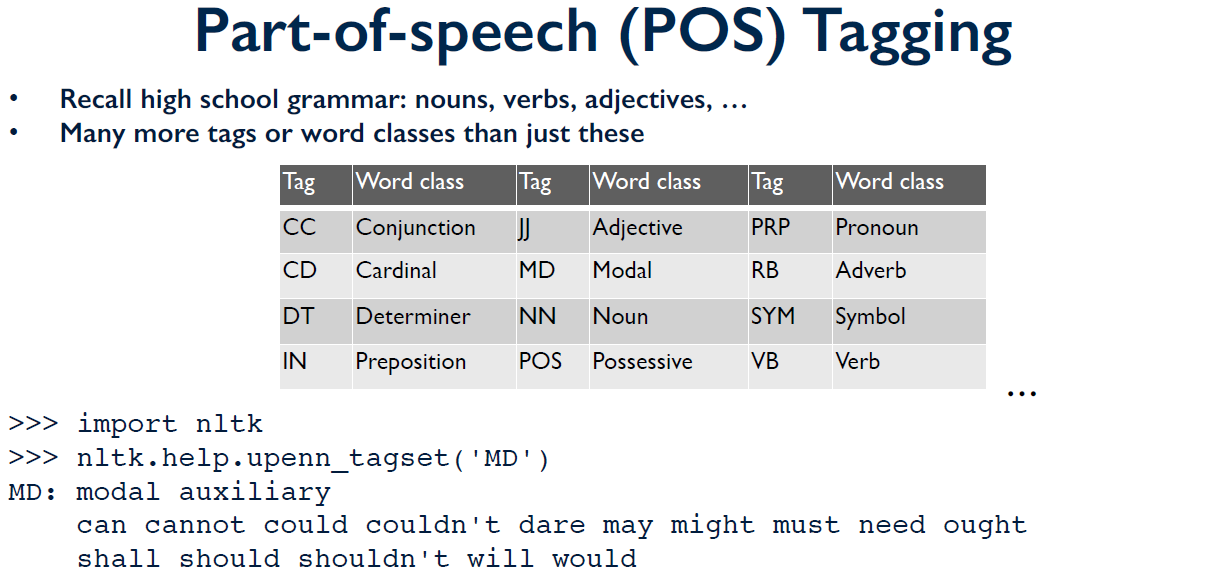

In [69]:
nltk.help.upenn_tagset('MD')

MD: modal auxiliary
    can cannot could couldn't dare may might must need ought shall should
    shouldn't will would


## POS Tagging in NLTK

In [74]:
text13 = nltk.word_tokenize(text11)  # First tokenize the string
nltk.pos_tag(text13)  # Add POS tags

[('Children', 'NNP'),
 ('should', 'MD'),
 ("n't", 'RB'),
 ('drink', 'VB'),
 ('a', 'DT'),
 ('sugary', 'JJ'),
 ('drink', 'NN'),
 ('before', 'IN'),
 ('bed', 'NN'),
 ('.', '.')]

## Ambiguity in POS Tagging

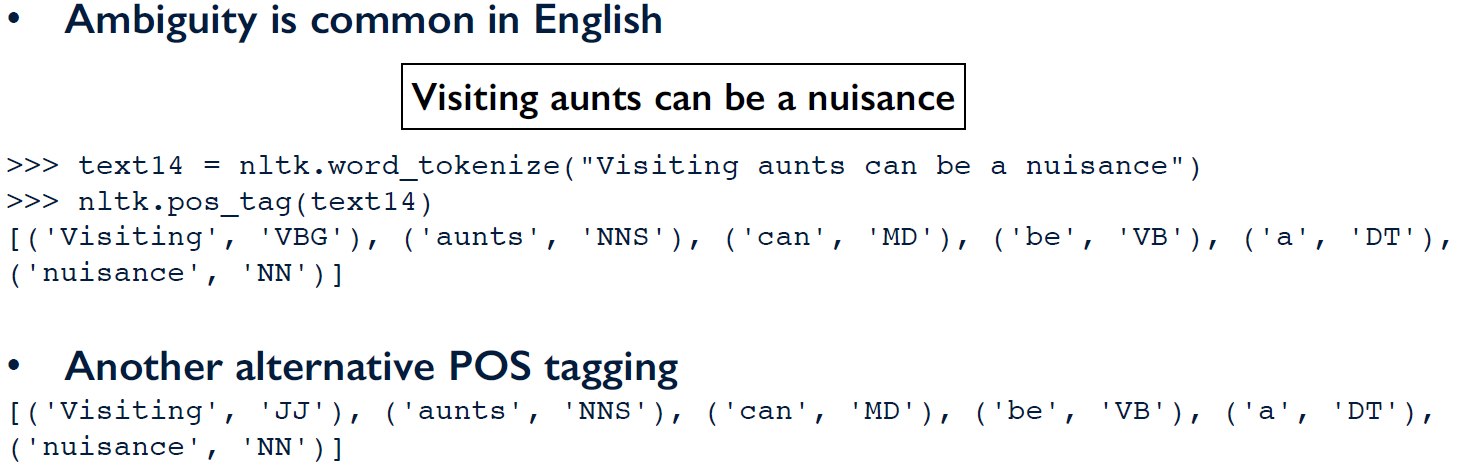

In [88]:
text14 = nltk.word_tokenize("Visiting aunts can be a nuisance")
nltk.pos_tag(text14)

[('Visiting', 'VBG'),
 ('aunts', 'NNS'),
 ('can', 'MD'),
 ('be', 'VB'),
 ('a', 'DT'),
 ('nuisance', 'NN')]

## Parsing Sentence Structure

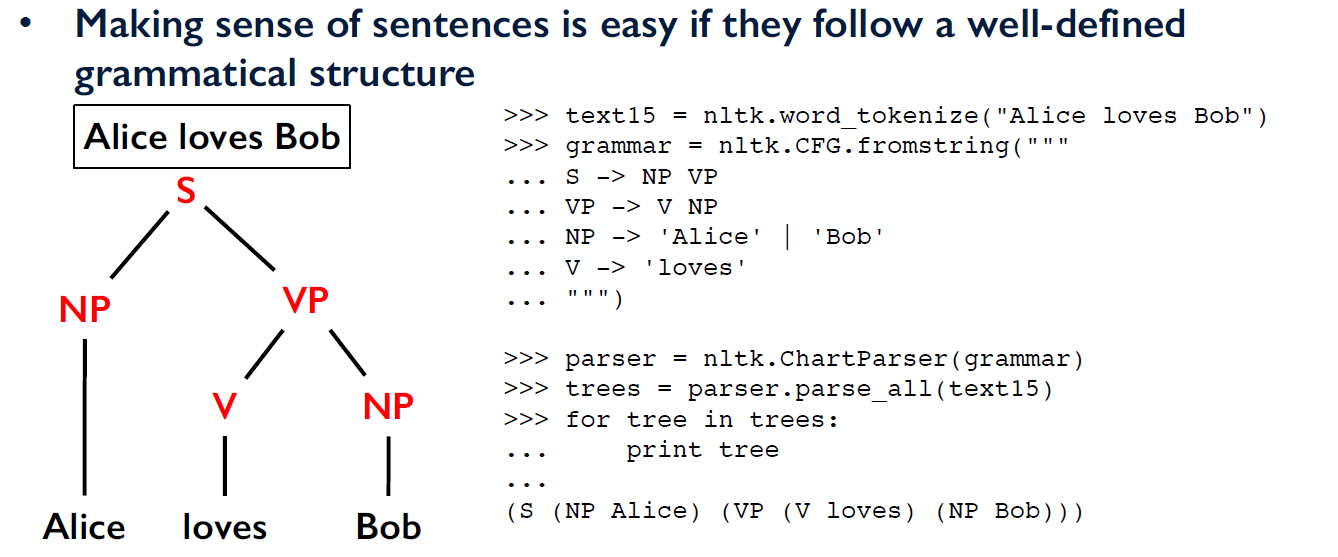

In [81]:
# Parsing sentence structure
text15 = nltk.word_tokenize("Alice loves Bob")
grammar = nltk.CFG.fromstring("""
S -> NP VP
VP -> V NP
NP -> 'Alice' | 'Bob'
V -> 'loves'
""")

parser = nltk.ChartParser(grammar)
trees = parser.parse_all(text15)
for tree in trees:
    print(tree)

(S (NP Alice) (VP (V loves) (NP Bob)))


## Ambiguity in Parsing

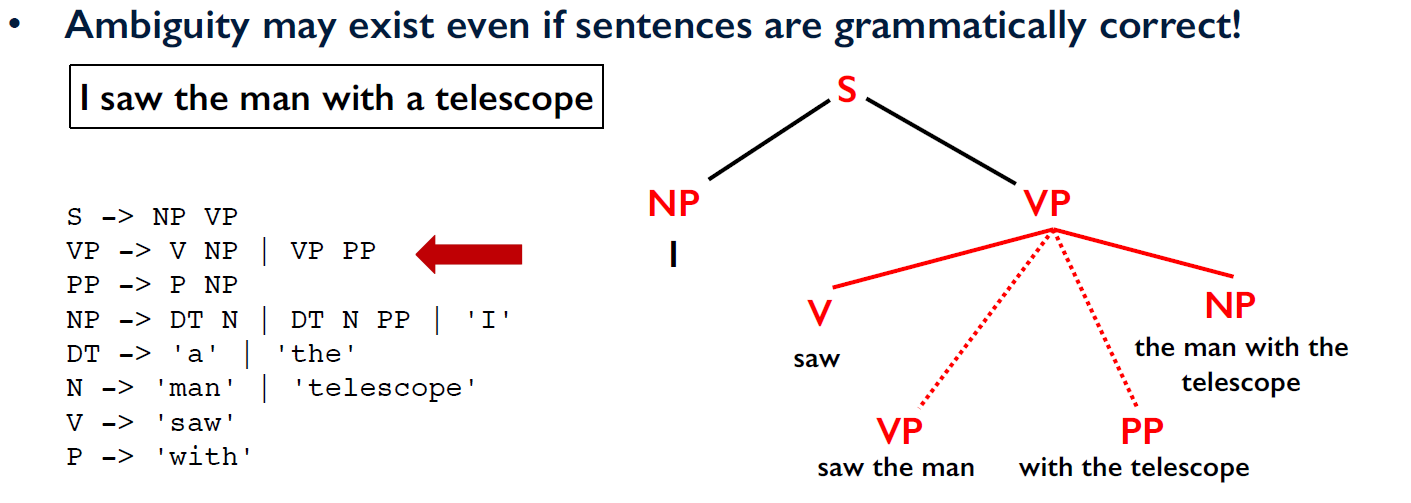

In [92]:
text16 = nltk.word_tokenize("I saw the man with a telescope")
grammar1 = nltk.data.load('../readonly/mygrammar.cfg')
grammar1

<Grammar with 13 productions>

In [93]:
parser = nltk.ChartParser(grammar1)
trees = parser.parse_all(text16)
for tree in trees:
    print(tree)

(S
  (NP I)
  (VP
    (VP (V saw) (NP (Det the) (N man)))
    (PP (P with) (NP (Det a) (N telescope)))))
(S
  (NP I)
  (VP
    (V saw)
    (NP (Det the) (N man) (PP (P with) (NP (Det a) (N telescope))))))


## NLTK and Parse Tree Collection

In [94]:
from nltk.corpus import treebank
text17 = treebank.parsed_sents('wsj_0001.mrg')[0]
print(text17)

(S
  (NP-SBJ
    (NP (NNP Pierre) (NNP Vinken))
    (, ,)
    (ADJP (NP (CD 61) (NNS years)) (JJ old))
    (, ,))
  (VP
    (MD will)
    (VP
      (VB join)
      (NP (DT the) (NN board))
      (PP-CLR (IN as) (NP (DT a) (JJ nonexecutive) (NN director)))
      (NP-TMP (NNP Nov.) (CD 29))))
  (. .))


## POS tagging and parsing ambiguity

### Uncommon usages of words

In [95]:
text18 = nltk.word_tokenize("The old man the boat")
nltk.pos_tag(text18)

[('The', 'DT'), ('old', 'JJ'), ('man', 'NN'), ('the', 'DT'), ('boat', 'NN')]

### Well-formed sentences may still be meaningless

In [96]:
text19 = nltk.word_tokenize("Colorless green ideas sleep furiously")
nltk.pos_tag(text19)

[('Colorless', 'NNP'),
 ('green', 'JJ'),
 ('ideas', 'NNS'),
 ('sleep', 'VBP'),
 ('furiously', 'RB')]

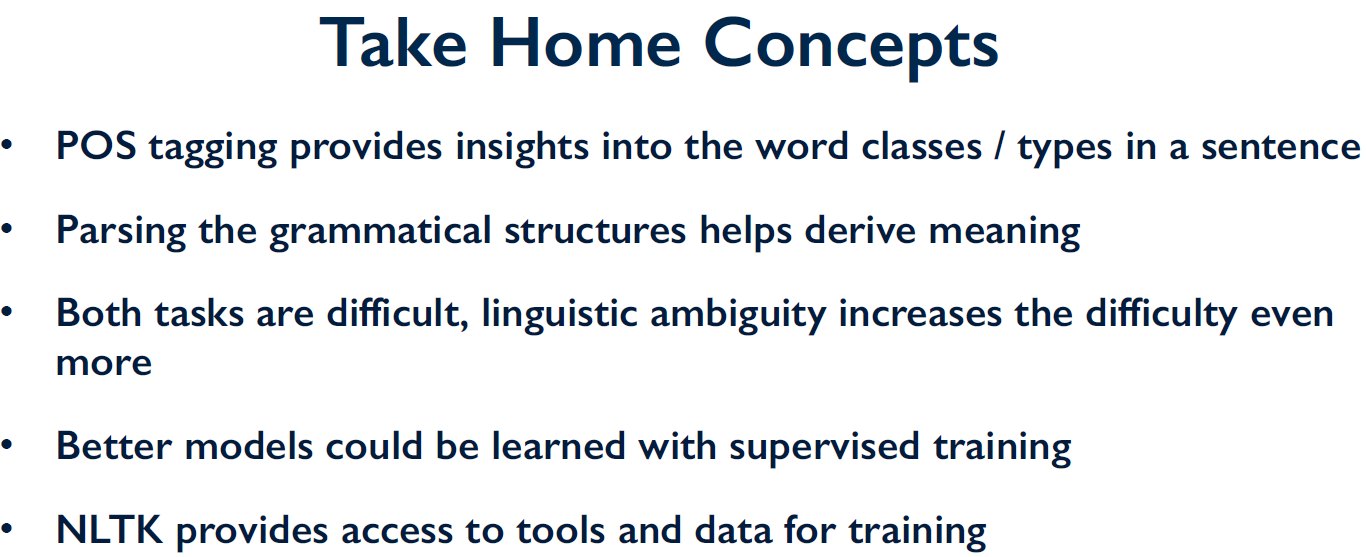